In [360]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [361]:
import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

from datetime import datetime
from IPython.display import display, HTML

In [362]:
import zipfile
with zipfile.ZipFile('spam_ham_data.zip') as item:
    item.extractall()

In [363]:
original_training_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Convert the emails to lowercase as the first step of text processing.
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [364]:
print('Before imputation:')
print(original_training_data.isnull().sum())
original_training_data = original_training_data.fillna('')
print('------------')
print('After imputation:')
print(original_training_data.isnull().sum())

Before imputation:
id         0
subject    6
email      0
spam       0
dtype: int64
------------
After imputation:
id         0
subject    0
email      0
spam       0
dtype: int64


# Train/Test Split

In [365]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(original_training_data, test_size = 0.1, random_state = 42)

train = train.reset_index(drop = True)

## Feature Engineering



In [366]:
from projB2_utils import words_in_texts

words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])

## EDA and Basic Classification



In [367]:

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]),
 array([0, 0, 0, 0, 0]))

In [368]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


In [369]:
# import libraries
# you may use any of these to create your features
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import GridSearchCV
import re
from collections import Counter

Comments: 
 I used the model features that I had in part one. I quickly realized that in order to make the cut-off I needed to add more and better features, I did a bit of research, that and some intuition based on empirical knowledge allowed me to get the best performing features, those that are clearly attention-grabbers, some examples are words that could involve money, ‘urgent’ matters or even advertisement for adult web- sites/products.


<!-- BEGIN QUESTION -->

<br>

---

## Proportion of words that are spam or ham


In [371]:
def words_in_texts(words, texts): 
    if texts.empty: 
        return np.zeros((len(texts), len(words)))
        
    indicator_array = np.column_stack([texts.str.contains(word) for word in words])
    return indicator_array 

In [372]:

from sklearn.linear_model import LogisticRegression
s_words = ['offer', 'update', 'sincerely', 'action', 'dear', 'thanks again', 'cheers', 'download', 'congratulations',
          'security', 'please', 'weight loss', 'click', 'yours', 'truly', 'take care', 'hot', 'opportunity']
other_words = []
X_train = words_in_texts(s_words, train['email'])
Y_train = train['spam'].values

my_model = LogisticRegression()

my_model.fit(X_train, Y_train)

training_accuracy2 = sum(my_model.predict(X_train) == Y_train)/len(Y_train)
print("Training Accuracy: ", training_accuracy2)

Training Accuracy:  0.8750166378277652


Text(0.5, 24.249999999999986, 'Emails')

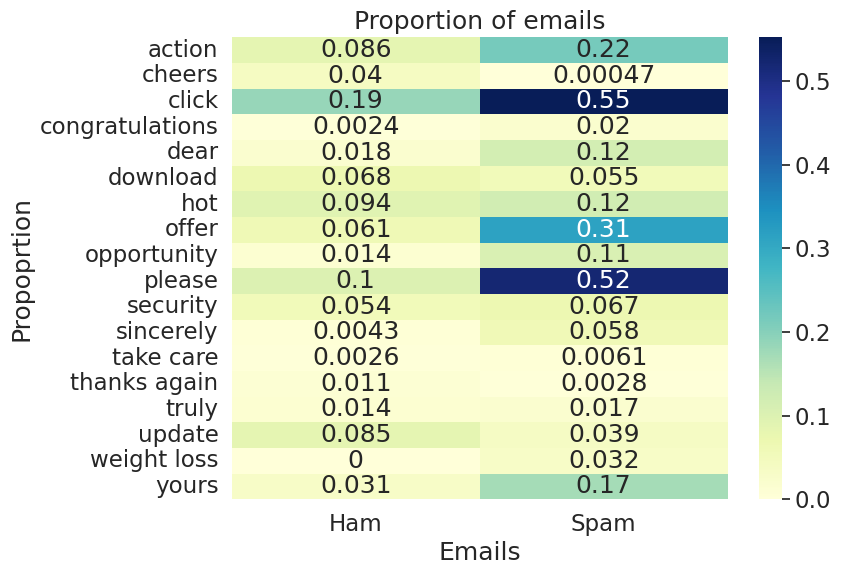

In [373]:
train = train.reset_index(drop=True) 
s_words = ['offer', 'update', 'sincerely', 'action', 'dear', 'thanks again', 'cheers', 'download', 'congratulations',
          'security', 'please', 'weight loss', 'click', 'yours', 'truly', 'take care', 'hot', 'opportunity']

new_matrix = words_in_texts(s_words, original_training_data['email'])
new_matrix_df = pd.DataFrame(new_matrix, columns=s_words)

new_matrix_df['spam'] = original_training_data['spam']

list = []
for w in s_words: 
    spam = new_matrix_df[new_matrix_df['spam'] == 1][w].mean()
    list.append({'type' : 'Spam', 'word': w, 'proportion': spam})

    ham = new_matrix_df[new_matrix_df['spam'] == 0][w].mean()
    list.append({'type' : 'Ham', 'word': w, 'proportion': ham})

list_df = pd.DataFrame(list)
plt.figure(figsize=(8,6))
data_for_hm = list_df.pivot(index = 'word', columns= 'type', values= 'proportion')
#sns.barplot(x='word', y = 'proportion', hue='type', data=list_df)
sns.heatmap(data = data_for_hm, annot=True, cmap='YlGnBu')
plt.title('Proportion of emails')
plt.ylabel('Propoprtion')
plt.xlabel('Emails')


##  ROC Curve




Text(0.5, 0, 'FPR')

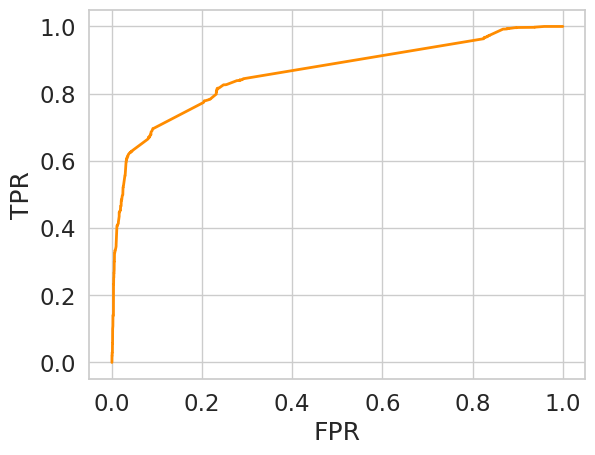

In [374]:
probabilities = my_model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_train, probabilities)
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label= 'ROC Curve')
plt.ylabel('TPR')
plt.xlabel('FPR')



# Train Predictions


In [375]:
s_words = ['offer', 'update', 'sincerely', 'action', 'dear', 'thanks again', 'cheers', 'download', 'congratulations',
          'security', 'please', 'weight loss', 'click', 'yours', 'truly', 'take care', 'hot', 'opportunity']
X_train = words_in_texts(s_words, train['email'])
Y_train = train['spam'].values

my_model = LogisticRegression()
my_model.fit(X_train, Y_train)
train_predictions = my_model.predict(X_train)

training_accuracy = np.mean(train_predictions == train["spam"])
training_accuracy

0.8750166378277652


##  Test Set Predictions



In [377]:
s_words = ['offer', 'update', 'sincerely', 'action', 'dear', 'thanks again', 'cheers', 'download', 'congratulations',
          'security', 'please', 'weight loss', 'click', 'yours', 'truly', 'take care', 'hot', 'opportunity']

X_train = words_in_texts(s_words, train['email'])
Y_train = train['spam'].values

my_model = LogisticRegression()
my_model.fit(X_train, Y_train)

X_test = words_in_texts(s_words, test['email'])
test_predictions = my_model.predict(X_test)
test_predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [379]:


submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = "submission_{}.csv".format(timestamp)
submission_df.to_csv(filename, index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
display(HTML("Download your test prediction <a href='" + filename + "' download>here</a>."))
print('You may now upload this CSV file to Gradescope for scoring.')#

Created a CSV file: submission_20231130_083734.csv.


You may now upload this CSV file to Gradescope for scoring.
